### Normalizzazione dei Dati: Pulire i dati per rimuovere eventuali valori mancanti o errati. Applicare la normalizzazione Z-score alla temperatura_media, precipitazioni, umidità e velocità_vento per standardizzarle.

In [73]:
import pandas as pd

# Carica il dataset
dataset_path = "dataset_climatico.csv"
df = pd.read_csv(dataset_path)

# Rimuove le righe con valori mancanti
df = df.dropna()  

# Applica la normalizzazione Z-score e aggiunge una colonna per ogni variabile
columns_to_normalize = ['temperatura_media', 'precipitazioni', 'umidita', 'velocita_vento']

for column in columns_to_normalize:
    if column in df.columns:
        media = df[column].mean()
        deviazione_standard = df[column].std()
        z_score_column_name = f"{column}_z_score"
        df[z_score_column_name] = (df[column] - media) / deviazione_standard
    else:
        print(f"Colonna '{column}' non trovata nel dataset.")

print(df.info)






<bound method DataFrame.info of     data_osservazione  temperatura_media  precipitazioni    umidita  \
0          2022-01-01           3.345032       16.712921  66.028263   
1          2022-01-02          34.640506        9.669180  52.891332   
2          2022-01-03           1.223902       17.623765  82.054851   
3          2022-01-04          -5.234223       18.328380  48.785933   
4          2022-01-05          32.792867        5.431022  64.595705   
..                ...                ...             ...        ...   
995        2024-09-22          -5.320537       15.081807  83.219598   
996        2024-09-23          30.855431       14.381540  57.652988   
997        2024-09-24          21.907286       11.191411  43.524909   
998        2024-09-25          17.687439       11.692892  49.286315   
999        2024-09-26          25.662451        1.825414  30.166257   

     velocita_vento stazione_meteorologica  temperatura_media_z_score  \
0         75.580829        Stazione Napoli

### Calcolare statistiche descrittive (media, mediana, deviazione standard) per ogni variabile.

In [88]:
# calcola media,mediana e deviazione standard
media = df.mean(numeric_only=True)
mediana = df.median(numeric_only=True)
deviazione_standard = df.std(numeric_only=True)


# Stampa media,mediana e deviazione standard
print("Media:\n", media.round(2))
print("Mediana:\n", mediana.round(2))
print("Deviazione Standard:\n", deviazione_standard.round(2))
    

Media:
 temperatura_media            12.61
precipitazioni               10.16
umidita                      60.44
velocita_vento               47.61
temperatura_media_z_score    -0.00
precipitazioni_z_score       -0.00
umidita_z_score              -0.00
velocita_vento_z_score       -0.00
dtype: float64
Mediana:
 temperatura_media            12.10
precipitazioni               10.27
umidita                      59.89
velocita_vento               46.66
temperatura_media_z_score    -0.04
precipitazioni_z_score        0.02
umidita_z_score              -0.03
velocita_vento_z_score       -0.03
dtype: float64
Deviazione Standard:
 temperatura_media            13.29
precipitazioni                5.85
umidita                      17.25
velocita_vento               28.40
temperatura_media_z_score     1.00
precipitazioni_z_score        1.00
umidita_z_score               1.00
velocita_vento_z_score        1.00
dtype: float64


### Creare grafici (istogrammi, box plots) per visualizzare la distribuzione di ciascuna variabile normalizzata.

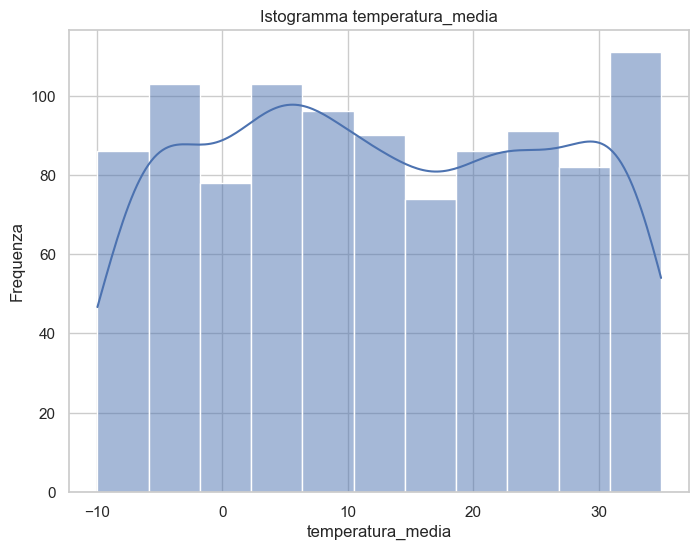

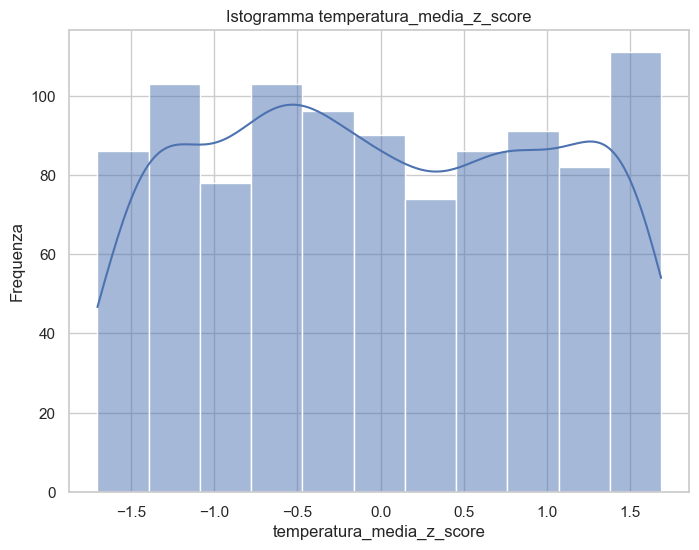

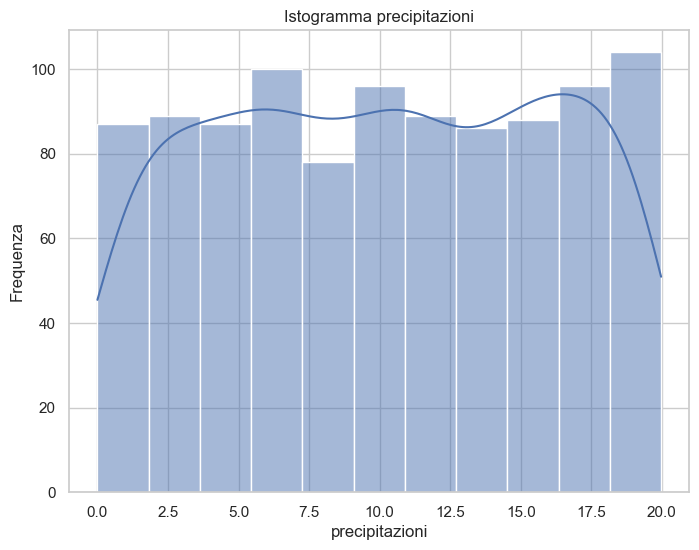

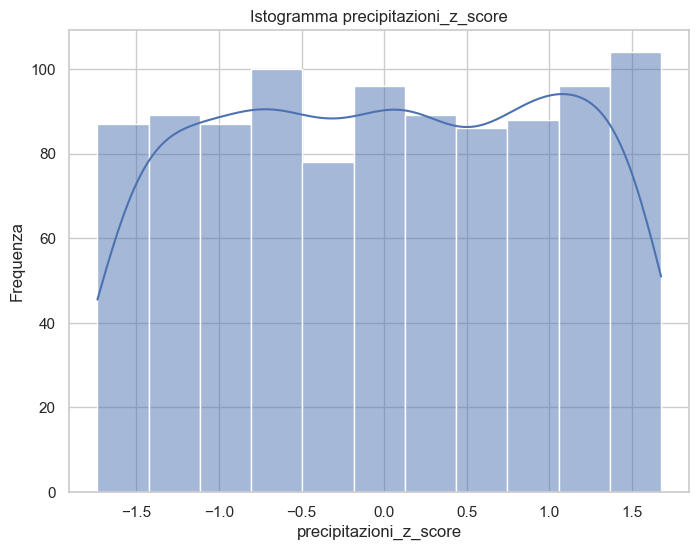

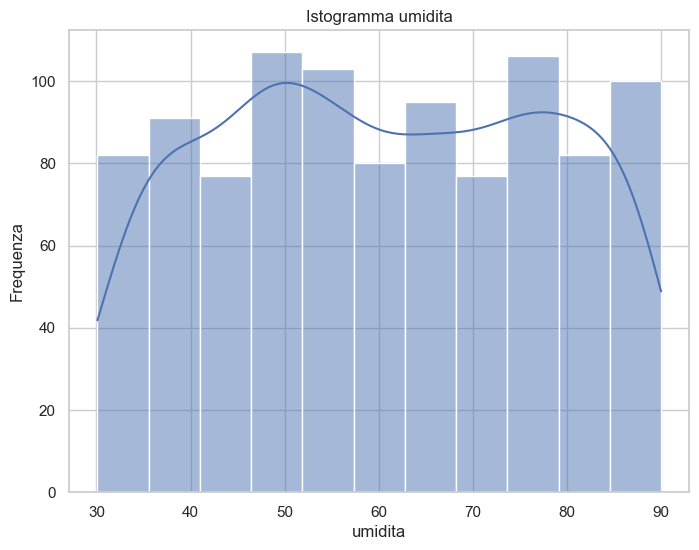

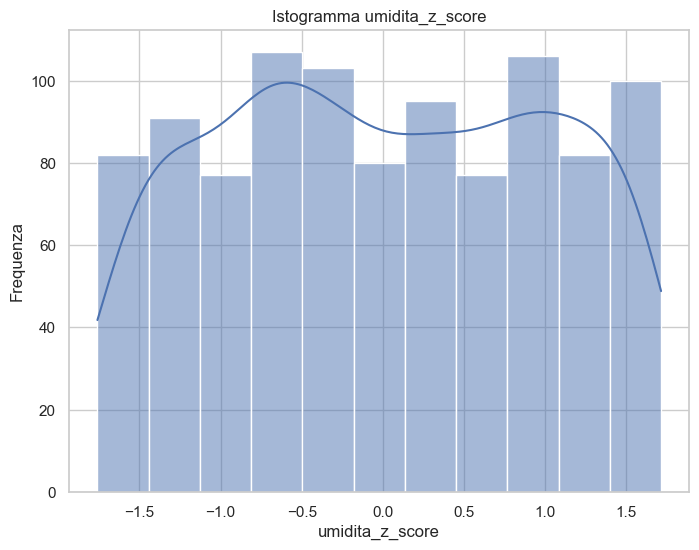

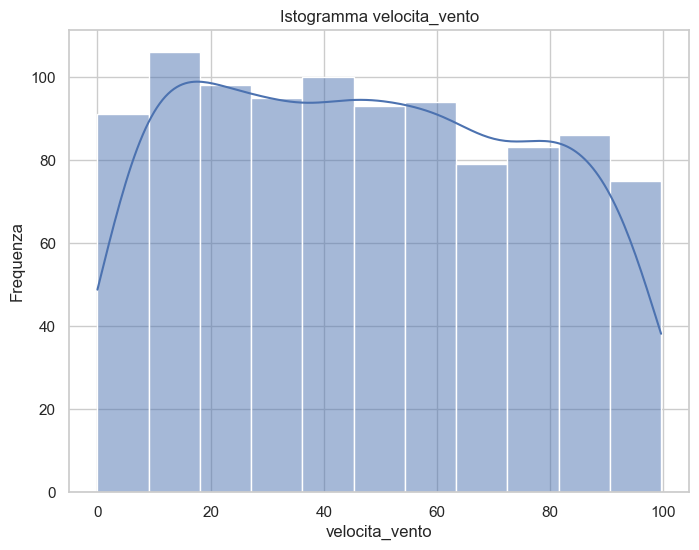

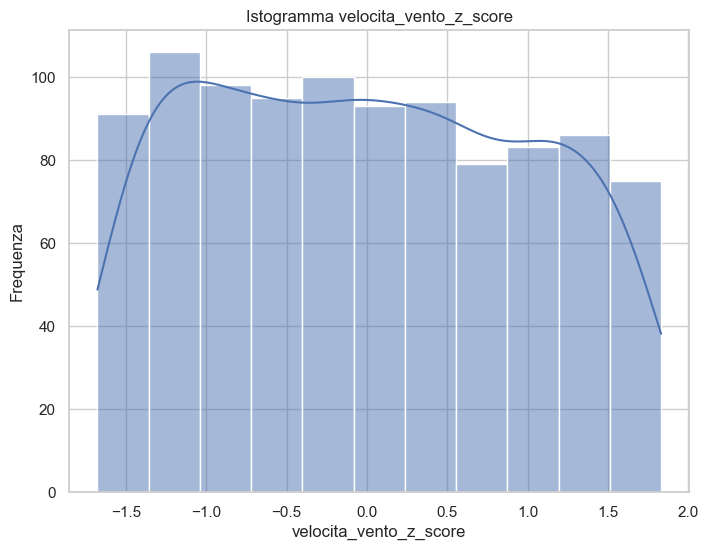

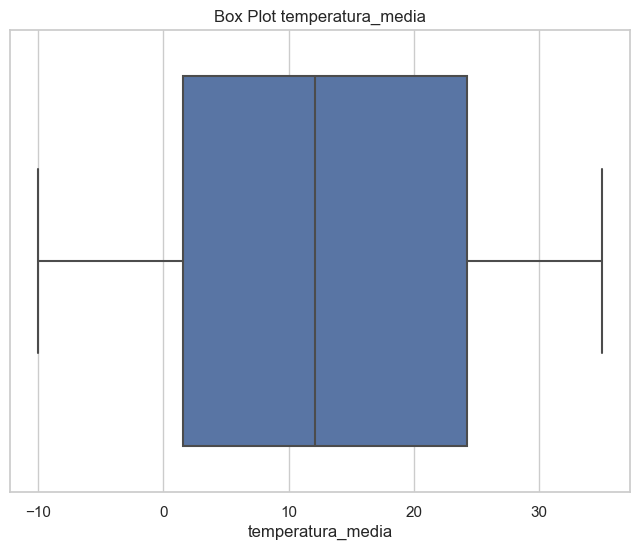

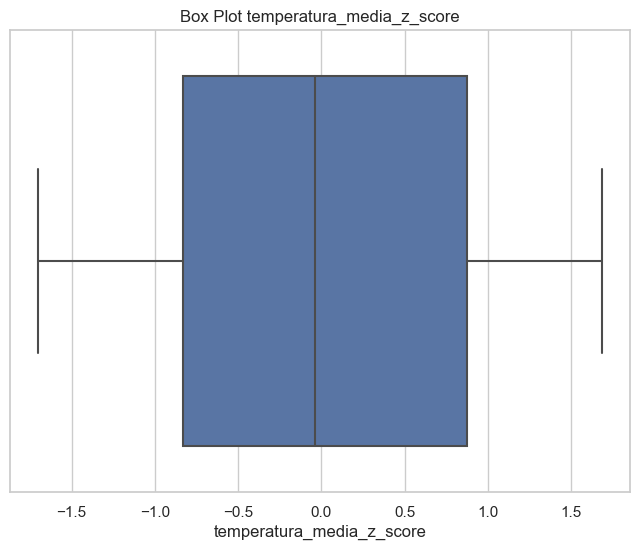

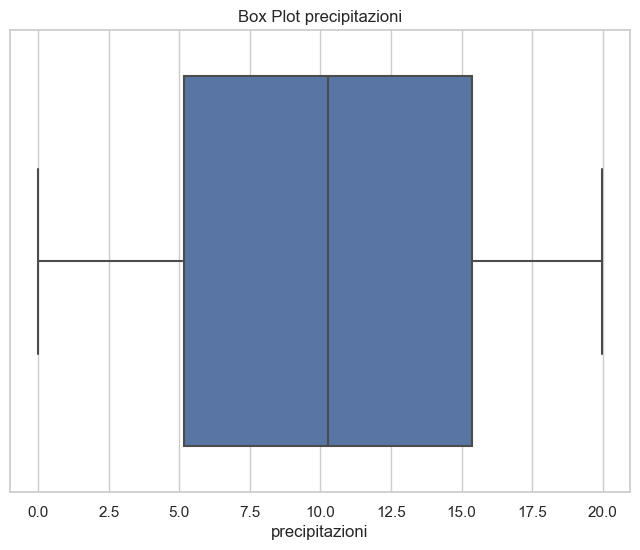

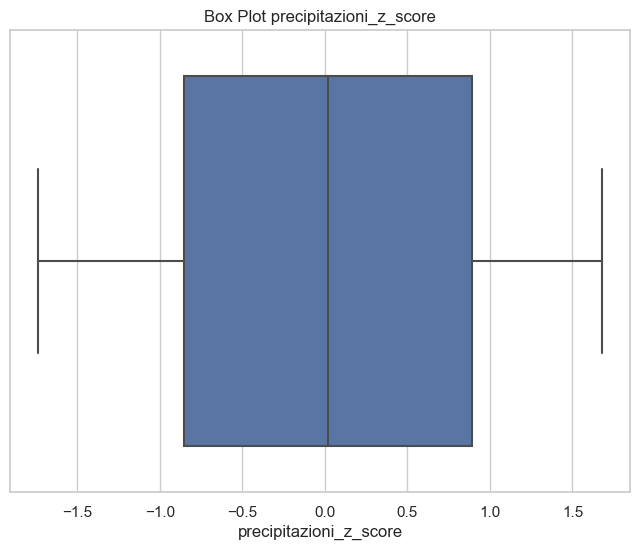

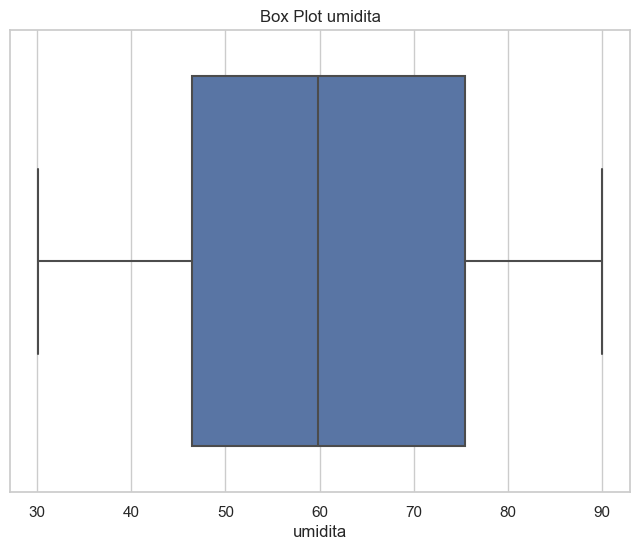

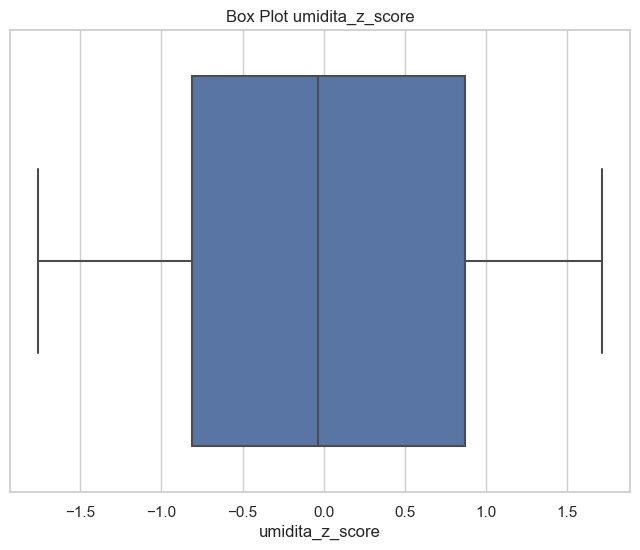

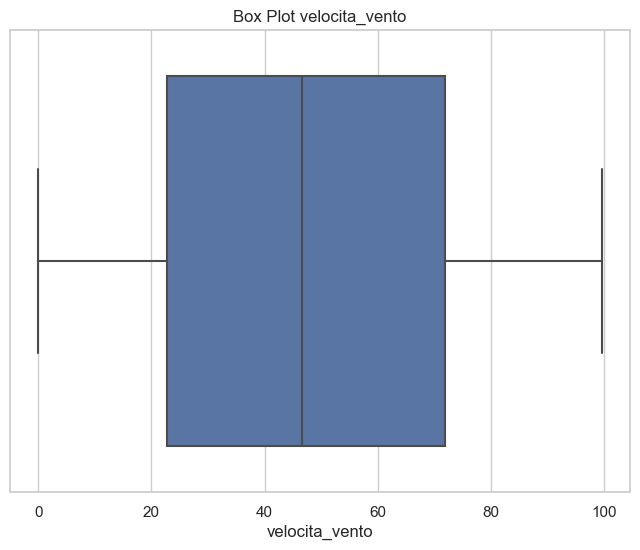

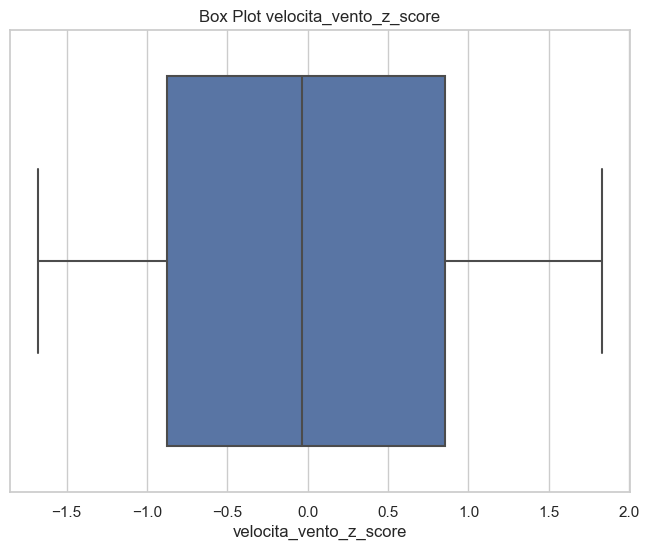

In [67]:

import matplotlib.pyplot as plt
import seaborn as sns


# Lista delle variabili su cui creare i grafici 
selected_variables = ['temperatura_media', 'temperatura_media_z_score', 'precipitazioni', 'precipitazioni_z_score', 'umidita', 'umidita_z_score', 'velocita_vento', 'velocita_vento_z_score']

# Creazione di istogrammi
for column in selected_variables:
    if column in df.columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Istogramma {column}')
        plt.xlabel(column)
        plt.ylabel('Frequenza')
        plt.show()

# Creazione di box plots
for column in selected_variables:
    if column in df.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Box Plot {column}')
        plt.xlabel(column)
        plt.show()




### Utilizzare una heatmap per visualizzare la correlazione tra le diverse variabili meteorologiche. Identificare eventuali correlazioni significative (es. tra temperatura e umidità).
### Risposta: Tra temperatura e umidità c'è una correlazione di 0,05 il che ci indica che tra i due dati c'è una correlazione estremamente debole e quasi vicina allo zero.

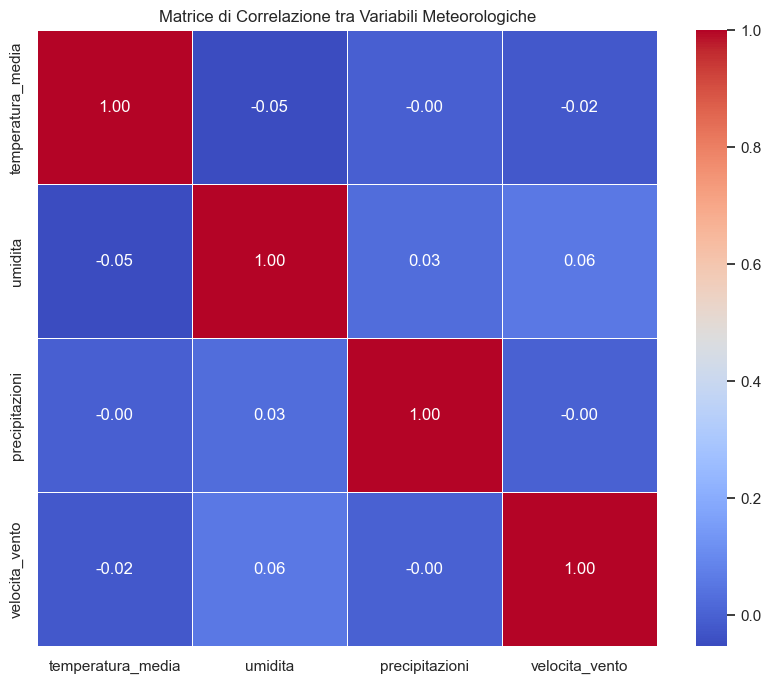

In [71]:


# Definisce le colonne da includere nella matrice di correlazione
selected_columns = ['temperatura_media', 'umidita', 'precipitazioni', 'velocita_vento']

selected_df = df[selected_columns]

# Calcola la matrice di correlazione
correlation_matrix = selected_df.corr()

plt.figure(figsize=(10, 8))

# Crea la heatmap della matrice di correlazione
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title("Matrice di Correlazione tra Variabili Meteorologiche")

# Mostra la heatmap
plt.show()


# Interpretazione dei Risultati:
## Scrivere un breve report che riassume i risultati dell'analisi, evidenziando eventuali tendenze o correlazioni interessanti.
### Dall'analisi effettuata, risulta che la media delle temperature medie giornaliere è stata di 12.61 grani, la media delle precipitazioni è state di 10.61 mm, la media dell'umidità relativa è stata del 60.44% e che la velocità del vento media è stata di 47.61 km/h.
### Non sono emerse forti correlazioni tra i dati analizzati, e l'unico dato davvero significativo è stato quello relativo alla velocità media del vento pari a 47.61 km/h che suggerisce che ci sono condizioni che favorevoli all'utilizzo dell'energia eolica.